### **Daegu Apartment Price Prediction**

Created by: Jeffrey Junior Tedjasulaksana

[Daegu apartment data source](https://www.kaggle.com/datasets/gunhee/koreahousedata)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recomendation

****

### **Businees Problem Understanding**

**Context**

[Daegu](https://en.wikipedia.org/wiki/Daegu) is South Korea's third-largest urban agglomeration after Seoul and Busan, the third-largest official metropolitan area in the country with over 2.5 million residents and the second-largest city in the Yeongnam region in the southeastern Korean Peninsula after Busan.

Daegu was Korea's economic hub from the 1960s to the 1980s, and it was particularly well-known for its electronics industry. Daegu's humid subtropical climate is ideal for growing high-quality apples, hence the nickname "Apple City." Daegu is also referred to as "Textile City." Textiles were once the city's mainstay industry. Daegu is currently focusing on fostering fashion and high-tech industries.      
        
Because of Daegu's rapid development, the demand for apartment housing has increased. Daegu city [reached 240,000 apartments by 2021](https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/#statisticContainer). 

Because Korean citizens are so busy, they do not have enough time to meet with potential buyers, many apartment unit owners entrust property agents with sales transactions. The significance of determining property values can help to simplify property buying and selling transactions. According to [Statista](https://www.statista.com/statistics/1048638/south-korea-number-of-unsold-housings-daegu/) data, the number of properties in Daegu City that have not been sold by 2021 is 2000 property.

According to the [ruhl and ruhl home web](https://www.ruhlhomes.com/selling-a-home/importance-to-price-right/#:~:text=Pricing%20your%20home%20at%20fair,sell%20at%20a%20lower%20price), pricing your property at a reasonable market value will attract potential buyers. The longer a property sits on the market, the lower its perceived value and the likelihood that it will be sold at a lower price. As a result, tools in an application are required to determine the estimated price of a property for property agent.

**Problem Statement**

As the population in Daegu City increases, there will also be an increase in the need for housing, especially apartments in Daegu City. So that property agents must streamline the costs incurred to get maximum revenue.

Based on research conducted by [Onur Demirci from the University of Westminster](https://westminsterresearch.westminster.ac.uk/download/2dae110e45564422696a65c873989232ffbea0a3e58d318a552b963485e4452f/570796/Research%20Paper%20-%20Traditional%20and%20Mass%20%28Advanced%29%20Valuation%20Methods.pdf), valuation is a process that involves defining the fair market. When valuing a group of properties, it is widely acknowledged that traditional valuation has numerous limitations. value of an entity Traditional valuation methods have significant limitations in terms of accuracy, consistency, and speed. 

**Goals**

Based on research conducted by [Onur Demirci](https://westminsterresearch.westminster.ac.uk/download/2dae110e45564422696a65c873989232ffbea0a3e58d318a552b963485e4452f/570796/Research%20Paper%20-%20Traditional%20and%20Mass%20%28Advanced%29%20Valuation%20Methods.pdf), the weakness of Traditional Valuation can be overcome by conducting advance valuation with a regression machine learning model. With an increasing volume of transactions and a changing real estate market, advanced valuation (regression machine learning model) is becoming more applicable.

So that tools in the form of machine learning models that have been made will be used when apartment unit owners want to sell apartment units through property agents, then property agents will enter apartment unit specifications that issue price predictions of apartment units to be marketed. And I as a machine learning engineer from a property agent company will create and maintain the tools that have been created.

**Analytic Approach**

We must analyze features such as the type of hallway, travel time to the subway, facilities in and around the apartment, and the year of construction, all of which may affect the apartment's sale price.

We can create a regression model based on the analysis results to to determine the price of the apartment unit based on the specifications owned.

**Metric Evaluation**

To test the error rate of an already created model, we can use MAE and MAPE.

MAE is the average value of absolute error because its characteristics that are less sensitive to outliers so MAE is better than MSE. 

![MAE](https://github.com/JeffreyJuinior/Daegu-Apartment-Price-Prediction/blob/main/Images/MAE.PNG?raw=true)

MAPE is the average of the recidual absolute results in the form of percentages, just like MAE, MAPE has characteristics that are less sensitive to outliers because the target contains an outlier. Suitable for a very large target value range, the model is better at predicting the selling price of the apartment.

![MAPE](https://github.com/JeffreyJuinior/Daegu-Apartment-Price-Prediction/blob/main/Images/MAPE.PNG?raw=true)

We also use R-Square in model evaluation where R-Square explains how much variation in Y value can be explained by the model, The more the R-Squared value approaches 1, the better the model is at predicting apartment prices.

![R2](https://github.com/JeffreyJuinior/Daegu-Apartment-Price-Prediction/blob/main/Images/r2.png?raw=true)

### **Data Understanding**

- Dataset obtained from the official website of the Korean government, namely [data.go.kr](https://www.data.go.kr/) from 2007 to 2017
- Each row represents information related to the apartment

**Attributes Information**

|**Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Types of apartment hallways |
| TimeToSubway | Object | Measure time takes from apartment to subway station  |
| Subway Station | Object | Name of subway station nearby apartment |
| N_FacilitiesNearBy(ETC) | Float | number of other facilities such as hotels and special schools |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of public offices nearby apartment |
| N_SchoolNearBy(University) | Float | Number of universities nearby apartment |
| N_Parkinglot(Basement) | Float | Count number of parking spaces on basement |
| YearBuilt | Integer | The year when the apartment was created |
| N_FacilitiesInApt | Integer | Number of facilities for residents like swimming pool, gym, play ground |
| Size(sqf) | Integer | Size of apartment in square feet |
| SalePrice | Integer | Apartment price in US dollar |

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset into pandas dataframe
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **Exploratory Data Analysis**

Since the summation result does not produce a decimal number then we can continue the EDA process

**Distribution of Daegu Apartement price**

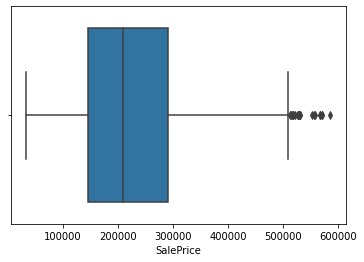

In [3]:
# Checking outliers on the target
sns.boxplot(df['SalePrice'])
plt.show()

From the boxplot results above, it can be seen that the SalePrice feature which is the target there is a right skewed distribution

In [4]:
# Check the number of apartments based on the nearest subway station and hallway type

print(f"Number of apartments based on the nearest subway station: \n{df['SubwayStation'].value_counts()}")
print(f"\nNumber of apartments based on the hallway type: \n{df['HallwayType'].value_counts()}")


Number of apartments based on the nearest subway station: 
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Number of apartments based on the hallway type: 
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Most apartments are located close to the subway station Kyungbuk_uni_hospital and Myung-duk and also the type of hallway that is sold mostly terrace and mixed

In [5]:
pd.crosstab(df['SubwayStation'],df['HallwayType'], margins=True).sort_values('All',ascending=False)

HallwayType,corridor,mixed,terraced,All
SubwayStation,,,,
All,464,1131,2528,4123
Kyungbuk_uni_hospital,49,0,1103,1152
Myung-duk,222,555,267,1044
Banwoldang,50,0,479,529
Bangoge,0,502,0,502
Sin-nam,51,0,416,467
no_subway_nearby,41,0,249,290
Chil-sung-market,0,74,0,74
Daegu,51,0,14,65


Most types of hallway apartments that are near the **Kyungbuk_uni_hospital subway station are terraced**, while apartments located near the **Myung-duk subway station are dominated by mixed although the difference is not too significant with other types**.

In [6]:
# Check the median value sale price based on the nearest subway station

pd.crosstab(index = df['SubwayStation'], columns = 'SalePrice', values=df['SalePrice'],aggfunc='median').sort_values('SalePrice',ascending=False)

col_0,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0
Myung-duk,154424.5
Chil-sung-market,88495.0
Daegu,86725.0


We can see that apartments near Kyungbuk uni hospital and Myung-duk subway station have prices that are neither too high nor too low.

<AxesSubplot:xlabel='SubwayStation'>

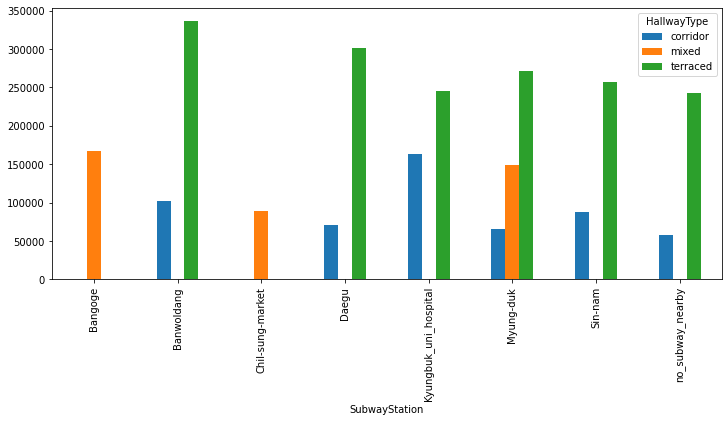

In [7]:
ct_price = pd.crosstab(df['SubwayStation'],df['HallwayType'], values=df['SalePrice'],aggfunc='median')
ct_price.plot.bar(figsize=(12,5))

In [8]:
pd.crosstab(df['SubwayStation'],df['HallwayType'], values=df['SalePrice'],aggfunc='median')

HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


From the chart above, we can know that apartments located close to the **Kyungbuk_uni_hospital subway station** in the **terraced hallway type have a median price that tends to be low** but in the **corridor hallway type has the highest median price**. we can assume that apartments located close to the Kyungbuk_uni_hospital subway station have a **high demand** for apartments that have a **corridor hallway type**

While the apartment located near **Myung-duk subway station** with **corridor hallway type has a median price that tends to be low** but in the **terrace hallway type has a price that tends to be high**.

### **Data Preprocessing**

Data preprocessing is the process of preparing raw data for use with a machine learning model. It must be cleaned and the data must be formatted. A data set typically contains noise, missing values, and may be in an unusable format that cannot be used directly for machine learning models. Data preprocessing is a necessary task for cleaning the data and preparing it for a machine learning model, which improves the accuracy and efficiency of the machine learning model.

Next, check all data features such as data type (DataType), missing value (Null), percentage of missing value of all data (NullPercentage), number of unique values (Unique), and unique values Sample (Unique Sample).

In [9]:
FeatureDesc = []

for i in df.columns:
    FeatureDesc.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

DfFeatureDesc = pd.DataFrame(data = FeatureDesc,
columns = [
    'Features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

DfFeatureDesc

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[terraced, mixed]"
1,TimeToSubway,object,0,0.0,5,"[no_bus_stop_nearby, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[Kyungbuk_uni_hospital, Chil-sung-market]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[2.0, 5.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[7.0, 6.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[930.0, 524.0]"
7,YearBuilt,int64,0,0.0,16,"[2006, 1992]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[1, 2]"
9,Size(sqf),int64,0,0.0,89,"[135, 1643]"


**1. Missing Value check**

From the dataframe above we can see that there is no missing value at all

**2. Data type check**

The results of the data type check above show that the attributes N FacilitiesNearBy (ETC), N FacilitiesNearBy (PublicOffice), N SchoolNearBy (University), and N Parkinglot (Basement) should be integer type because it makes no sense for example the number of facilities has a float data type so that further analysis will be carried out.

Check whether there are decimal numbers in the attribute by performing addition, if the addition result produces a decimal value, it is necessary to analyze the attribute.

In [10]:
print(f"N_FacilitiesNearBy(ETC): {df['N_FacilitiesNearBy(ETC)'].sum()}")
print(f"N_FacilitiesNearBy(PublicOffice): {df['N_FacilitiesNearBy(PublicOffice)'].sum()}")
print(f"N_SchoolNearBy(University): {df['N_SchoolNearBy(University)'].sum()}")
print(f"N_Parkinglot(Basement): {df['N_Parkinglot(Basement)'].sum()}")

N_FacilitiesNearBy(ETC): 7961.0
N_FacilitiesNearBy(PublicOffice): 17050.0
N_SchoolNearBy(University): 11323.0
N_Parkinglot(Basement): 2345901.0


Since the summation result does not produce a decimal number then we can continue the data preprocessing.

**3. Check duplicate data**

In [11]:
# Check duplicate data
df.duplicated().sum()

1422

We will ignore duplicate data because there is no feature that acts as a primary key, so that it is very possible for our dataset to have duplicated data.

**4. Drop Columns**

We can use domain knowledge at the current feature selection stage, where all current features have relevance to our target feature, namely the sale price. So we won't drop any features.

**4.1. Descriptive Statistical Numerical Features**

Describe all numeric features to see if there are any anomalous features, for example the value of the feature is less than 0 or the sale price is worth 0.

In [12]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


From the results describe all features have realistic values, so we can continue the preprocessing data.

**4.2 Data Correlation**

Data Correlation is the mutual relationship, covariation, or association between two or more variables.

Because the target data is not normally distributed  then we use the **spearman** method to see the correlation between features.

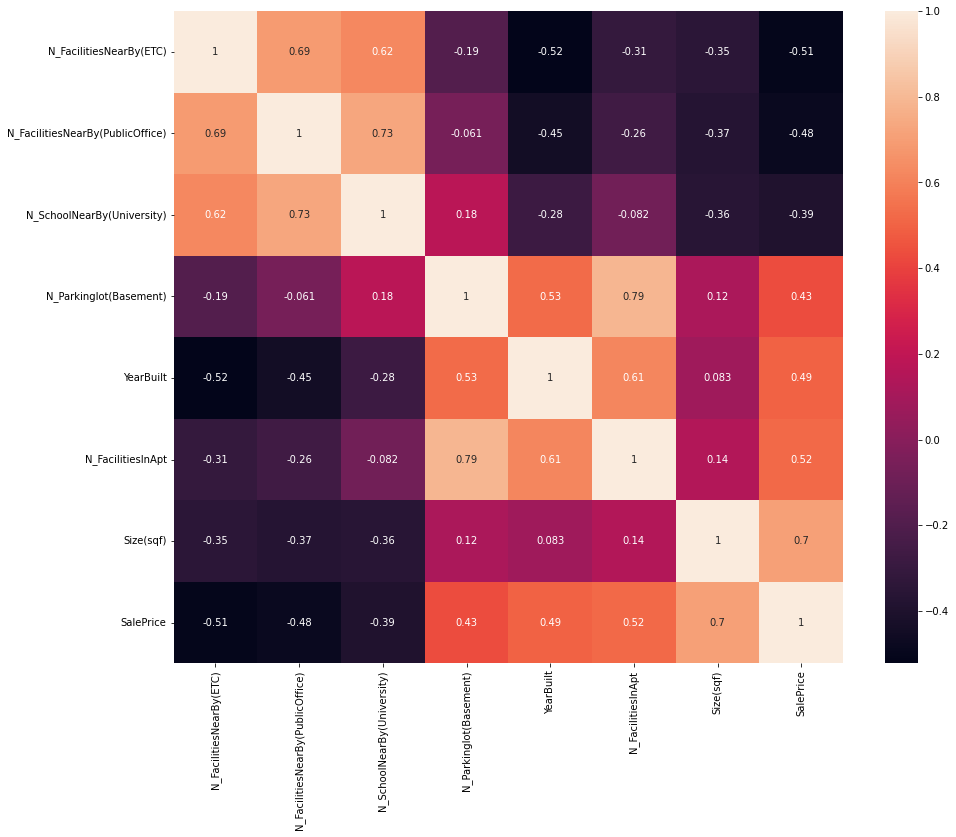

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

The correlation matrix shows that the feature with the highest correlation with the sale price feature is the unit area (size (sqf)), which is 0.7, implying that the wider the units sold, the higher the price and there is also no multicollinearity between features. Despite the fact that some features have a low correlation to the sale price feature, we will not drop the feature due to the small number of all features in the data.

**4.3 Outlier Detection**

Outliers are datapoints in a dataset that contain abnormal observations among the normal observations, resulting in strange accuracy scores that can skew measurements because the results do not represent the actual results. An outlier is an observation that appears far away and deviates from a sample's overall pattern. Outliers in input data can skew and mislead machine learning algorithms' training processes, resulting in longer training times, less accurate models, and ultimately poorer results.

<AxesSubplot:>

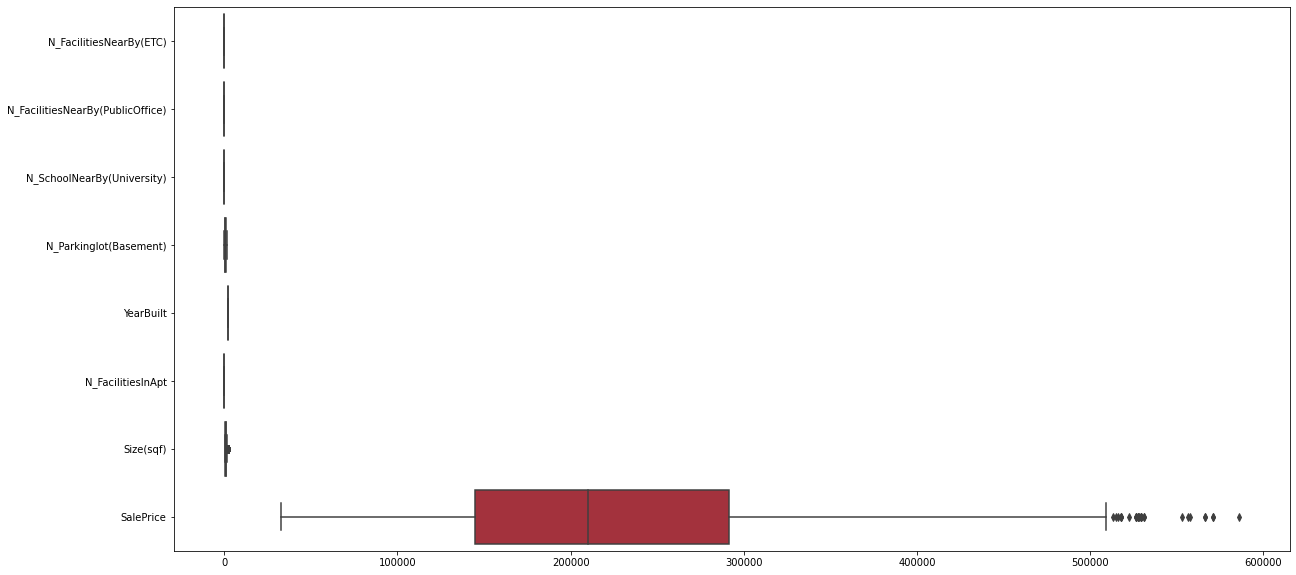

In [14]:
# Plot to check outlier
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient="h", palette="RdBu_r")

From the boxplot results, there is an outlier on several features such as the salePrice  and Size (sqf) feature then processing will be carried out on each feature so that there will be data limitations.

In [15]:
# Create a function to check outliers
def check_outlier(col):
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5 * IQR)
    lower_fence = Q1 - (1.5 * IQR)
    return IQR,upper_fence, lower_fence

**4.3.1 Sale Price**

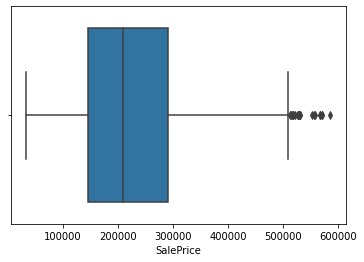

In [16]:
# Data distribution plot on salePrice feature
sns.boxplot(df['SalePrice'])
plt.show()

In [17]:
# Outlier on Sale Price feature
IQR, upper_fence, lower_fence = check_outlier('SalePrice')
print("IQR SalePrice")
print('IQR\t\t: ',IQR)
print('Upper Fence\t: ',upper_fence)
print('lower_fence\t: ',lower_fence)

IQR SalePrice
IQR		:  146398.0
Upper Fence	:  510747.0
lower_fence	:  -74845.0


In [18]:
# Check the descriptive statistics of the sale price feature
df['SalePrice'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [19]:
# Check salePrice > 510747.0
print("SalePrice amount > 510747\t\t: ",df[df['SalePrice'] > 510747.0].count()['SalePrice'])
print("Percentage of salePrice amount > 510747\t: ",round((df[df['SalePrice'] > 510747.0].count()['SalePrice'])/4123*100,3),"%")


SalePrice amount > 510747		:  27
Percentage of salePrice amount > 510747	:  0.655 %


According to descriptive statistics, the third quartile on the SalePrice feature is worth less than $291150, while the maximum value is very large, at $585840. 

As a result, the data is not normally distributed, resulting in positive skewness. There are 27 data in our data whose salePrice value is greater than $291150, or only 0.655% of the data. We will drop the data so that the skewness can be reduced, resulting in modeling limitations.

In [20]:
# Filtering data
df = df[df['SalePrice'] <= 510747]

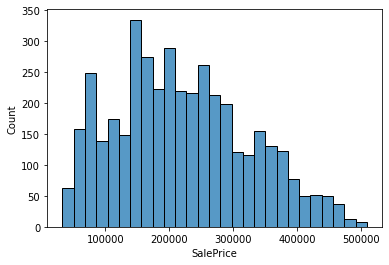

In [21]:
# Data distribution after filtering
sns.histplot(data=df, x="SalePrice")
plt.show()

Skewness on data distribution has been reduced which can be seen in the plot above.

In [22]:
# Check the descriptive statistics of the 'SalePrice' feature after filtering
df['SalePrice'].describe()

count      4096.000000
mean     219692.548828
std      103961.039574
min       32743.000000
25%      144752.000000
50%      207964.000000
75%      287610.000000
max      508849.000000
Name: SalePrice, dtype: float64

**4.3.2 size(sqf)**

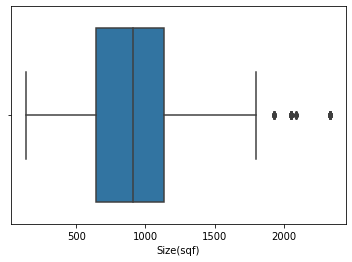

In [23]:
# Data distribution plot on size(sqf) feature
sns.boxplot(df['Size(sqf)'])
plt.show()

In [24]:
# Outlier on Size(sqf) feature
IQR, upper_fence, lower_fence = check_outlier('Size(sqf)')
print("IQR Size(sqf)")
print('IQR\t\t: ',IQR)
print('Upper Fence\t: ',upper_fence)
print('lower_fence\t: ',lower_fence)

IQR Size(sqf)
IQR		:  487.0
Upper Fence	:  1861.5
lower_fence	:  -86.5


In [25]:
# Check the descriptive statistics of the Size(sqf) feature
df['Size(sqf)'].describe()

count    4096.000000
mean      949.107178
std       378.608713
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [26]:
# Check Size(sqf) > 1861.5
print("Size(sqf) amount > 1861.5\t\t: ",df[df['Size(sqf)'] > 1861.5].count()['Size(sqf)'])
print("Percentage of Size(sqf) amount > 1861.5\t: ",round((df[df['Size(sqf)'] > 1861.5].count()['Size(sqf)'])/4123*100,3),"%")


Size(sqf) amount > 1861.5		:  81
Percentage of Size(sqf) amount > 1861.5	:  1.965 %


From the boxplot it can be clearly seen that there is an outlier, then because the percentage of outliers is very small, which is only 1.965%, we will drop all data that has a size (sqf) greater than 1861.5.

In [27]:
# Filtering data
df = df[df['Size(sqf)'] <= 1861.5]

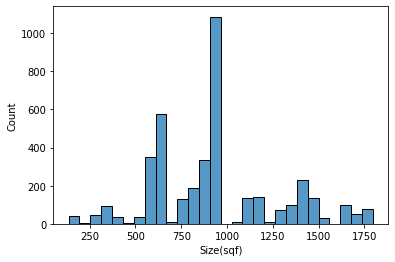

In [28]:
# Data distribution after filtering
sns.histplot(data=df, x="Size(sqf)")
plt.show()

Skewness on data distribution has been reduced which can be seen in the plot above.

In [29]:
# Check the descriptive statistics of the 'Size(sqf)' feature after filtering
df['Size(sqf)'].describe()

count    4015.000000
mean      925.216936
std       341.828592
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      1796.000000
Name: Size(sqf), dtype: float64

In [30]:
# Check the dataset feature info from the cleansing results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4015 non-null   object 
 1   TimeToSubway                      4015 non-null   object 
 2   SubwayStation                     4015 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4015 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4015 non-null   float64
 5   N_SchoolNearBy(University)        4015 non-null   float64
 6   N_Parkinglot(Basement)            4015 non-null   float64
 7   YearBuilt                         4015 non-null   int64  
 8   N_FacilitiesInApt                 4015 non-null   int64  
 9   Size(sqf)                         4015 non-null   int64  
 10  SalePrice                         4015 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 505.4+ KB


The total amount of data dropped is 108 data or 2.62% of the total data.

### **Modeling**

In [31]:
# Import library

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler,PolynomialFeatures, PowerTransformer, OneHotEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

**1. Separating Independent Variable Data from targets**

In [32]:
## Separating Independent Variable Data from targets
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

**2. Data Splitting**

In [33]:
# Splitting training and test data with a proportion of 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.20,
    random_state=99)

**3. Choosing the 2 best base models by cross validation**



Cross-Validation is a technique that helps to make our model sure about its efficiency and accuracy on the unseen data. It is a method for evaluating Machine Learning models by training several other Machine learning models on subsets of the available input data set and evaluating them on the subset of the data set.

**3.1. Create a machine learning pipeline**

Machine learning pipeline is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome.By using the pipeline we can also avoid data leakage, which is a condition where the model knows the condition of the test data can be due to imputation or when doing fit. So it must be avoided so that the value of the evaluation Matrix test set is more valid and trustworthy.

Here are some steps from the machine learning pipeline:

1. Data input.
2. Features of the inputted data will be divided into category-type features and numeric-type features.
3. Carry out the feature engineering process or transform of the feature such as doing feature scaling, polynomial feature, encoding, etc. 
4. Transform results of category-type features and numeric-type features will be combined using column transformers.
5. Next is the estimator where the pipeline contains the transformer column results and the algorithm to be used.

Next, we will grouping features by data type, with the 'num_columns' list containing **numeric** type features and the 'cat_columns_OHE' and 'cat_columns_Ordinal' lists containing **categorical** type data. The purpose of grouping is to enable feature engineering based on the type of feature.

In [34]:
# Grouping features by data type

num_columns = ['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','YearBuilt','N_FacilitiesInApt','Size(sqf)' ]
cat_columns_OHE = ['HallwayType','SubwayStation']
cat_columns_Ordinal = ['TimeToSubway']

Then create cross validation using the machine learning pipeline 

In [35]:
## Feature Engineering
# Feature Engineering on numeric Features
num_pipeline = Pipeline([
    ('Scaler',StandardScaler()),
    ('Power',PowerTransformer(method='yeo-johnson'))
])
# Encode Categoric Features using One Hot Encoding
cat_pipeline_OHE = Pipeline([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
# Encode Categoric Feature using Ordinal Encoder
cat_pipeline_Ordinal = Pipeline([
    ('Ordinal', ce.OrdinalEncoder(mapping = [{
                                    'col': 'TimeToSubway', 
                                    'mapping': {'no_bus_stop_nearby': 0, 
                                                '15min~20min': 1, 
                                                '10min~15min': 2, 
                                                '5min~10min': 3,
                                                '0-5min':4}}
                                         ]))
])

## Transform a set of columns
preprocessor = ColumnTransformer([
    ('numeric', num_pipeline, num_columns),
    ('categoric_OHE', cat_pipeline_OHE, cat_columns_OHE),
    ('categoric_Ordinal',cat_pipeline_Ordinal, cat_columns_Ordinal)
])

## Define a set of algorithms to be tested
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=99), RandomForestRegressor(random_state=99), XGBRegressor(random_state=99)]

## List declaration for storing r2, MAE, MAPE values
r2_mean = []
r2_std = []

MAE_mean = []
MAE_std = []

MAPE_mean = []
MAPE_std = []

## Iterations to test the model
for model in models:
    kf = KFold(n_splits=5)

    estimator = Pipeline([
        ('prep', preprocessor),
        ('algo', model)
    ])

    # R2 Score
    cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=kf, 
        scoring='r2', 
        )

    r2_mean.append(cv_r2.mean())
    r2_std.append(cv_r2.std())

    # MAE
    cv_MAE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = kf,
        scoring = 'neg_mean_absolute_error'
    )

    MAE_mean.append(cv_MAE.mean())
    MAE_std.append(cv_MAE.std())

    # MAPE
    cv_MAPE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring='neg_mean_absolute_percentage_error'
    )

    MAPE_mean.append(cv_MAPE.mean())
    MAPE_std.append(cv_MAPE.std())

**Feature Engineering**

Feature engineering is the process of extracting features from a dataset and assisting the predictive model in better representing underlying problems, which improves the model's accuracy in predicting data.

1. Numeric:

- Feature Scalling : Standard Scaler

    **Feature scaling** is used to change the entire feature to have the same range, for distance-based algorithms this can improve accuracy because any difference in order of magnitude in our different feature values will cause the feature with the widest range to dominate the metric, thus taking most of the importance of the model.

    Although the scalling feature is more suitable for distance-based algorithms but it can also be used on tree-based algorithms and does not reduce the accuracy of the model Significantly. In our case, we use feature scaling for distance and tree-based algorithms to make programming more efficient.

    **Standard Scaler** work with akes our data and makes it follow a Normal distribution, usually of mean 0 and standard deviation 1.

- Power Transform : Yeo-johnson

    Power transform will make features more normally distributed and reduce skew, it will work with calculating the log or square root of the features. we use yeo-johnson because it can shout features that are negative or 0, in our case it is like there is an apartment that does not have a parking lot. While the box-cox method requires features to have a value of more than 0.    

2. Categoric

    Because Machine Learning models cannot handle text data directly, Feature Encoding converts categorical features to numeric values.

- Ordinal Encoding

    Ordinal encoding converts categorical features to numeric features with weights or ratings. For example, in the time to subway feature, the shorter the time required to get to the subway, the greater the weight.

- One Hot Encoding

    one hot encoding is a type of encoding that works by adding the number of columns according to the number of unique values in the feature then giving a value of 1 in the column with that category and the rest of the columns are worth 0. so that the value on the feature has the same position (no one has a higher weight in the other).

**3.2 Evaluation Matrix** 

In [55]:
# Evaluation results of 5 base models using polynomial features
eva_matrix_base = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'R2_Mean' : r2_mean,
    'R2_Std' : r2_std,
    'MAE_Mean': MAE_mean,
    'MAE_Std': MAE_std,
    'MAPE_Mean': MAPE_mean,
    'MAPE_Std': MAPE_std
})

In [56]:
# Sorting the evaluation matrix based on r2 mean
eva_matrix_base.sort_values('R2_Mean',ascending=False)

,Model,R2_Mean,R2_Std,MAE_Mean,MAE_Std,MAPE_Mean,MAPE_Std
4,XGBoost Regressor,0.831796,0.010871,-33393.799687,822.151260,-0.183476,0.004540
2,DecisionTree Regressor,0.831795,0.010886,-33397.562519,835.463923,-0.183464,0.004556
3,RandomForest Regressor,0.831490,0.010869,-33406.759031,835.620650,-0.183788,0.004982
1,KNN Regressor,0.810527,0.011017,-34044.096715,861.370607,-0.182365,0.005975
0,Linear Regression,0.776933,0.020802,-39835.628472,1836.247061,-0.222828,0.006551


The most stable algorithm are Decision Tree Regressor and XGBoost Regressor, next we will do tuning on the hyperparameter to get the best results from the model.

**4. Hyperparameter Tuning**

Hyperparameters are parameters found in machine learning, and we will do the tuning process on those parameters by trying some reasonable parameter values from the algorithm to get the best results from the model.

**4.1 XGBoost Algorithm**

Next, we will hyperparameter tuning the XGBoost algorithm

In [38]:
# defines xgboost parameter
param_XGB = {
    "algo__n_estimators" : [100, 150],
    "algo__max_depth" : [1, 2, 3],
    "algo__learning_rate" : np.logspace(-3, 0, 4),
    "algo__gamma" : np.logspace(-3, 2, 6),
    "algo__colsample_bytree" : [.3, .5, .7],
    "algo__subsample" : [.3, .5, .7],
    "algo__reg_alpha" : np.logspace(-3, 3, 7), 
    "algo__reg_lambda" : np.logspace(-3, 3, 7)

}

**Hyperparameter on XGBoost**

- n_estimators = The number of trees.
- max_dept = The maximum depth of a tree, but the deeper the tree, the more complex the model will be and cause an overfit, the maximum value used is usually 6.
- learning_rate = This value reduces the weight of new features in each boosting step, preventing overfitting or a local minimum. This number has to be between 0 and 1.
- gamma = A regularization term that is related to the model's complexity. It is the smallest amount of loss required for a leaf split to occur.
- colsample_bytree = The fraction of columns to be subsampled. It is related to the algorithm's speed and the prevention of overfitting.
- subsample = The training instance subsample ratio. When set to 0.5, XGBoost will randomly sample half of the training data before growing trees. This will help to avoid overfitting. 
- reg_lambda = On weights, there is an L2 regularization term. By increasing this value, the model becomes more conservative.
- reg_alpha = L1 regularization on the weights. As lambda, by increasing this value, the model becomes more conservative.

**Grid Search**

We will do hyperparameter tuning using the Search grid, where the search grid works by means of makes a grid over the search space and evaluates the model for all possible hyperparameters. It's good in the sense that it's straightforward and comprehensive. On the negative side, if the search space is large, it may be prohibitively expensive in terms of computation time.

Grid search is preferred over randomized search because randomized searches only use a random set of hyperparameters, whereas we want the best combination of parameters.

In [39]:
# Defines pipelines on XGBoost models
estimator_xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(random_state=99))
])

# Define number of folds
kf = KFold(n_splits=2)

# Do a grid search CV
XGB_GS = GridSearchCV(estimator_xgb, 
                    param_XGB, 
                    cv= kf, 
                    n_jobs=-1, 
                    verbose=1, 
                    scoring='r2'
                    )

# Fitting data training 
XGB_GS.fit(X_train, y_train)

Fitting 2 folds for each of 63504 candidates, totalling 127008 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          StandardScaler()),
                                                                                         ('Power',
                                                                                          PowerTransformer())]),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_SchoolNearBy(University)',
                                                                          'N_Parkinglot(Basement)',
                                                                          'YearBuilt',
                                                                          'N_F...
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'algo__learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'algo__max_depth': [1, 2, 3],
                         'algo__n_estimators': [100, 150],
                         'algo__reg_alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__reg_lambda': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__subsample': [0.3, 0.5, 0.7]},
             scoring='r2', verbose=1)

In [40]:
# Shows the best score as well as the best combination of parameters used
print("Best Tuning Score : ",XGB_GS.best_score_)
print("Best Parameter : ",XGB_GS.best_params_)

Best Tuning Score :  0.8307462518494848
Best Parameter :  {'algo__colsample_bytree': 0.5, 'algo__gamma': 0.001, 'algo__learning_rate': 0.1, 'algo__max_depth': 3, 'algo__n_estimators': 150, 'algo__reg_alpha': 1000.0, 'algo__reg_lambda': 1.0, 'algo__subsample': 0.7}


In [41]:
# Declaration of XGB_GS_Tuned variables that contains the best paramater combinations 
XGB_GS_Tuned = XGB_GS.best_estimator_

In [58]:
# Create an evaluation matrix function
def Eva_Matrix_Base(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_tr)
    y_pred_ts = Model.predict(X_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MAPE_test = mean_absolute_percentage_error(y_test, y_pred_ts)
    eva_data = {
    "Training" + Nama : [R2_train, MAE_train, MAPE_train ],
    "Testing" + Nama : [R2_test, MAE_test, MAPE_test, ],
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MAPE'])
        
    return df

In [59]:
# Perform XGB model testing after tuning with data testing 
df_XGB_GS_Tuned = Eva_Matrix_Base(XGB_GS_Tuned, X_train, X_test, y_train, y_test, 'XGB GS Tuned')
df_XGB_GS_Tuned

,TrainingXGB GS Tuned,TestingXGB GS Tuned
R2,0.840008,0.839132
MAE,32704.413216,32618.404003
MAPE,0.180425,0.179097


From the results of the evaluation matrix, we can see that the results of the R2 Score value from the XGBosst model on the training data are 0.84 and in the testing data of 0.839.

**4.2. Decision Tree Algorithm**

Next, we will hyperparameter tuning the Decision Tree algorithm

In [44]:
# defines Decision Tree parameter
param_dt = {
    
    "algo__max_features" : np.arange(0.1,1,0.1),
    "algo__max_depth": np.arange(2,20),
    "algo__min_samples_split" : np.arange(2,20),
    "algo__min_samples_leaf"  : np.arange(1,20),
    
}

**Hyperparameter on Decision Tree**

- max_features = Maximum number of features taken into account when splitting a node.
- max_depth = Each decision tree has a maximum number of levels.
- min_samples_split  = The minimum number of data points that can be placed in a node before it is split.
- min_samples_leaf = A leaf node can only have a certain number of data points.


In [45]:
# Defines pipelines on XGBoost models
estimator_dt = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor(random_state=99))
])

# Define number of folds
kf = KFold(n_splits=2)

# Do a grid search CV
DT_GS = GridSearchCV(estimator_dt, 
                    param_dt, 
                    cv= kf, 
                    n_jobs=-1, 
                    verbose=1, 
                    scoring='r2'
                    )

# Fitting data training 
DT_GS.fit(X_train, y_train)


Fitting 2 folds for each of 55404 candidates, totalling 110808 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          StandardScaler()),
                                                                                         ('Power',
                                                                                          PowerTransformer())]),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_SchoolNearBy(University)',
                                                                          'N_Parkinglot(Basement)',
                                                                          'YearBuilt',
                                                                          'N_F...
                                        DecisionTreeRegressor(random_state=99))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'algo__max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'algo__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'algo__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='r2', verbose=1)

In [46]:
# Shows the best score as well as the best combination of parameters used
print("Best Tuning Score : ",DT_GS.best_score_)
print("Best Parameter : ",DT_GS.best_params_)

Best Tuning Score :  0.8280842893500049
Best Parameter :  {'algo__max_depth': 11, 'algo__max_features': 0.9, 'algo__min_samples_leaf': 1, 'algo__min_samples_split': 17}


In [47]:
# Declaration of DT_GS_Tuned variables that contains the best paramater combinations 
DT_GS_Tuned = DT_GS.best_estimator_

In [60]:
# Perform Decision Tree model testing after tuning with data testing 
df_DT_GS_Tuned = Eva_Matrix_Base(DT_GS_Tuned, X_train, X_test, y_train, y_test, 'DT GS Tuned')

In [61]:
df_DT_GS_Tuned

,TrainingDT GS Tuned,TestingDT GS Tuned
R2,0.842487,0.838948
MAE,32277.820263,32457.800865
MAPE,0.177265,0.176406


From the results of the evaluation matrix, we can see that the results of the R2 Score value from the Decision Tree model on the training data are 0.84 and in the testing data of 0.838.

**4.3. Evaluation Matrix Comparison**

In [62]:
# Show XGBoost and Decision Tree models after tuning
pd.concat([df_XGB_GS_Tuned,df_DT_GS_Tuned], axis=1)

,TrainingXGB GS Tuned,TestingXGB GS Tuned,TrainingDT GS Tuned,TestingDT GS Tuned
R2,0.840008,0.839132,0.842487,0.838948
MAE,32704.413216,32618.404003,32277.820263,32457.800865
MAPE,0.180425,0.179097,0.177265,0.176406


From the evaluation matrix above, we can see that the best model is XGBoost which has been led to an R2 Score training and testing value of 0.84 and 0.839. Then in the results of testing XGB tuned has an MAE of 32618.4 and MAPE of 0.179.

In [63]:
# Show XGBoost model before and after tuning
df_estimator_XGB = Eva_Matrix_Base(estimator_xgb, X_train, X_test, y_train, y_test, 'XGB GS')
pd.concat([df_estimator_XGB, df_XGB_GS_Tuned],axis=1)

,TrainingXGB GS,TestingXGB GS,TrainingXGB GS Tuned,TestingXGB GS Tuned
R2,0.842692,0.839071,0.840008,0.839132
MAE,32232.503575,32439.658001,32704.413216,32618.404003
MAPE,0.176887,0.176515,0.180425,0.179097


From the results of the evaluation matrix above, we can see that the results of the R2 Score of algortima XGBoost increased after tuning, which was approximately 0.0001 or 0.01% when tested using testing data, but the MAPE value increased by approximately 0.003 or 0.3%. While MAE value decreased.

**XGBoost**

XGBoost is an abbreviation for eXtreme Gradient Boosting. XGBoost is a gradient-driven decision tree implementation that is intended to be efficient and accurate.

![xgboost](https://github.com/JeffreyJuinior/Daegu-Apartment-Price-Prediction/blob/main/Images/ilustration_xgboost.png?raw=true)

From the illustration above we can see that the XGBoost algorithm works by fixing the residual from the previous prediction results but not from the beginning so as to produce good accuracy and more efficient.

### **Conclusion**

According to the evaluation matrix results, the best model after tuning was XGBoost with an R2 Score value of 0.839 or 83.9%, indicating that the model is quite good at explaining the variation in the Y value.

The model also has an average probability of error percentage (MAPE) of 0.179 or 17.9%, which means that the predicted apartment price can deviate from the actual price by 17.77%, which can be higher or lower than the original price. The average apartment price is 32618.4 dollars **off**.

The created model also has a limitation in that it can only predict apartments that cost less than 510747$ and have a room area of less than 32397 sqf. The model then only uses data on the prices of apartments in Daegu, South Korea, from 2007 to 2017.

**Impact of Implementation**

- Traditioanl Valuation 

    Market researchers take about 2 - 8 weeks to do research related to the best price of 1 apartment unit (Source: [HingeMarketing](https://hingemarketing.com/blog/story/cost_and_benefits_of_market_research) )


- Advanced Valuation (machine learning model)

    By using machine learning property agents can predict 1 unit Apartment prices in less than 1 day.

    

### **Recomdendations**

The following are recommendations for improving the model's ability to predict apartment prices:

1. Including features that have a higher correlation to Sale Price apartments, such as the number of apartment employees (janitor, security, maintenance staff, etc.), the number of apartment floors, information on whether apartment sales include or do not include furniture, and so on.

2. Increase the amount of the latest apartment data.

3. Try other regression algorithms such as Recursive Neural Network (RNN).

4. The current model can be improved by incorporating apartment data from other huge Korean cities such as Seoul and Busan, allowing the model to predict apartment prices in cities other than Daegu.

### **Save Model**

In [52]:
import pickle

XGB_GS_Tuned.fit(X_train, y_train)

pickle.dump(XGB_GS_Tuned, open('Apartment_Daegu_XGB.sav', 'wb'))